In [1]:
import numpy as np
import tensorflow as tf
import tensorboard_jupyter as tb
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
from sklearn import datasets

ops.reset_default_graph()
sess = tf.Session()

iris = datasets.load_iris()
binary_target = np.array([1. if x==0 else 0. for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

batch_size = 20

# batch_sizeが変動するのでshapeの1次元目はNone
with tf.name_scope('x1'):
    x1_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
with tf.name_scope('x2'):
    x2_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
with tf.name_scope('y'):
    y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

with tf.name_scope('A'):
    A = tf.Variable(tf.random_normal(shape=[1,1]))
with tf.name_scope('b'):
    b = tf.Variable(tf.random_normal(shape=[1,1]))
    
with tf.name_scope('model'):
    my_mult = tf.matmul(x2_data, A)
    my_add = tf.add(my_mult, b)
    my_output = tf.subtract(x1_data, my_add)

xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target)
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    rand_index = np.random.choice(len(iris_2d), size=batch_size)
    rand_x = iris_2d[rand_index]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_index]])
    sess.run(train_step, feed_dict={x1_data: rand_x1,
                                   x2_data: rand_x2,
                                   y_target: rand_y})
    if (i+1)%200 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))
        
tf.summary.FileWriter('./log/', sess.graph)
tb.show_graph(tf.get_default_graph().as_graph_def())

Step #200 A = [[ 8.61269379]], b = [[-3.44904351]]
Step #400 A = [[ 10.11168766]], b = [[-4.71523857]]
Step #600 A = [[ 11.10628891]], b = [[-5.35735416]]
Step #800 A = [[ 11.79533195]], b = [[-5.8913641]]
Step #1000 A = [[ 12.43692017]], b = [[-6.29556847]]


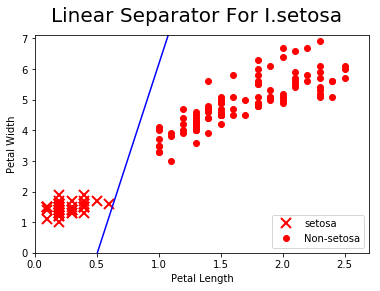

In [2]:

# Visualize Results
# Pull out slope/intercept
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)

# Create fitted line
x = np.linspace(0, 3, num=50)
ablineValues = []
for i in x:
  ablineValues.append(slope*i+intercept)

# Plot the fitted line over the data
setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]
non_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
non_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non-setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator For I.setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()